# UJM - Master DSC/MLDM - Deep Learning - TP2a - Autoencoders

# Part . Autoencoder

## 1.1 Feed-forward Autoencoder

We write a quick feed-forward autoencoder mapping from images of size 728 to 32, then decode back to size 728

In [3]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import ELU, PReLU, LeakyReLU, Conv2D, UpSampling2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import keras.losses as Losses
#import keras.backend as K

import random
import matplotlib.pyplot as plt
import sys
import numpy as np


In [4]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
#Note above we used the binary_categorical_crossentropy, you could also use the mean_squared_error,
#in that case you could also replace the sigmoid activation of the last layer by a ReLu/Linear activation

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

**Train the Autoencoder**

original images:


<Figure size 2000x200 with 0 Axes>

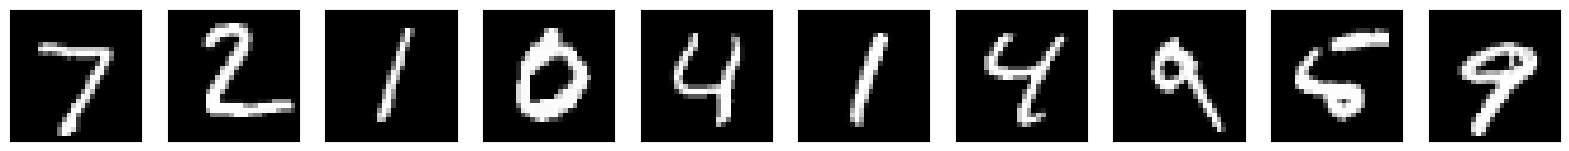

Reconstruction error:

[0.24824734032154083, 0.15673592686653137]


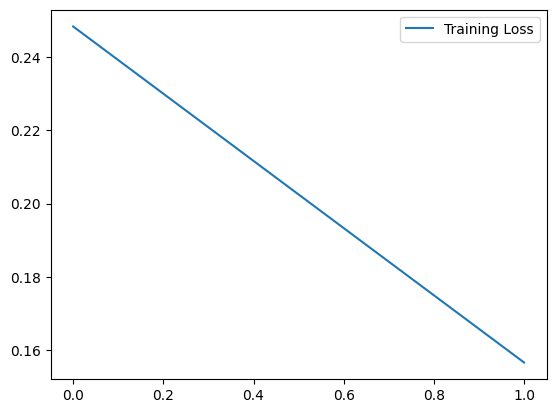

decoded images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


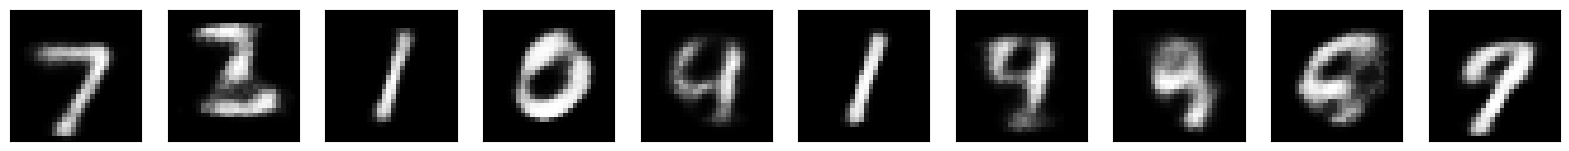

Corresponding mean square error: 

img  0   0.014608922
img  1   0.053550098
img  2   0.005257785
img  3   0.017951379
img  4   0.02421507
img  5   0.0030177478
img  6   0.04383601
img  7   0.04185697
img  8   0.05932964
img  9   0.021997437
Reconstruction error:

[0.13770940899848938, 0.12831857800483704]


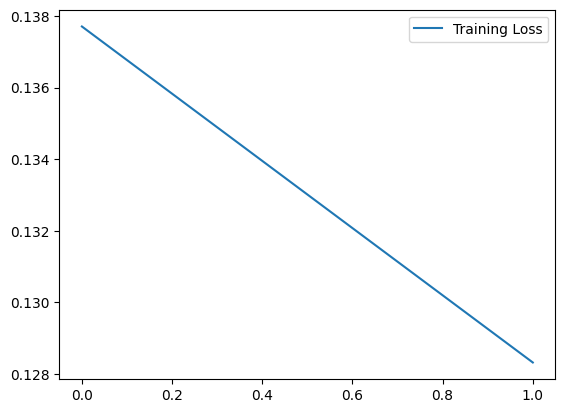

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


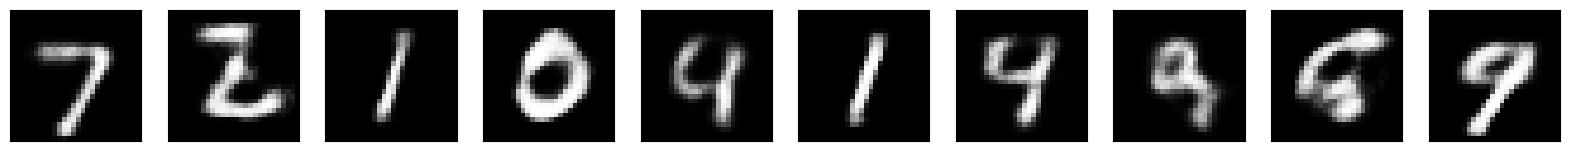

Corresponding mean square error: 

img  0   0.009410251
img  1   0.03640148
img  2   0.0047098384
img  3   0.01300449
img  4   0.015353388
img  5   0.0035534988
img  6   0.027600959
img  7   0.03125858
img  8   0.037913024
img  9   0.016439589


In [7]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(2):
    history=autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    print('Reconstruction error:\n')
    print(history.history['loss'])
    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    #We compute the reconstruction error for each test image
    print('Corresponding mean square error: \n')
    for i in range(10):
        mse = Losses.MeanSquaredError()
        print('img ',i,' ',mse(decoded_imgs[i],x_test[i]).numpy())



### Super encoding
In this case we reduce the encoded dimension to 2.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,130 (820.82 KB)

 Trainable params: 210,130 (820.82 KB)

 Non-trainable params: 0 (0.00 B)

original images:


<Figure size 2000x200 with 0 Axes>

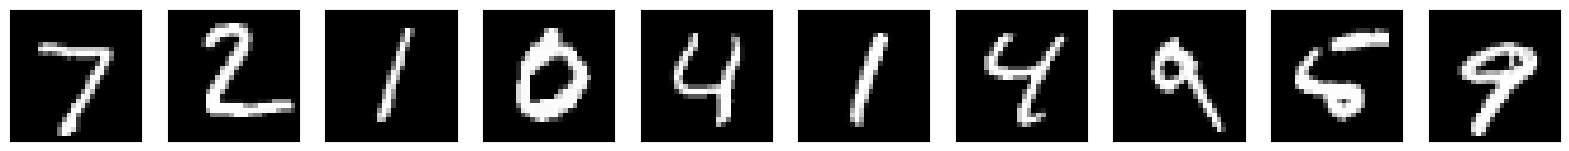

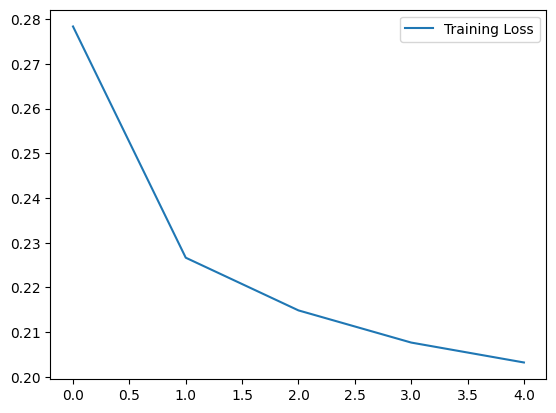

decoded images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


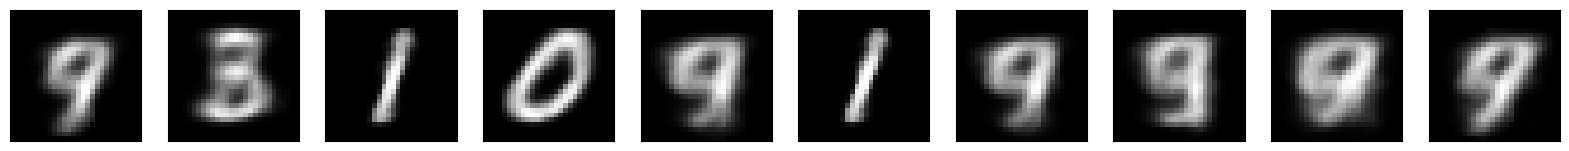

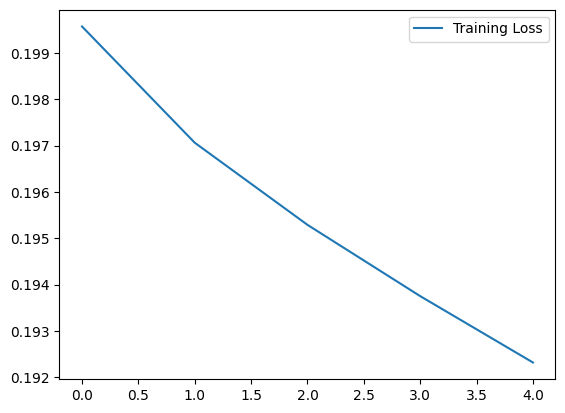

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


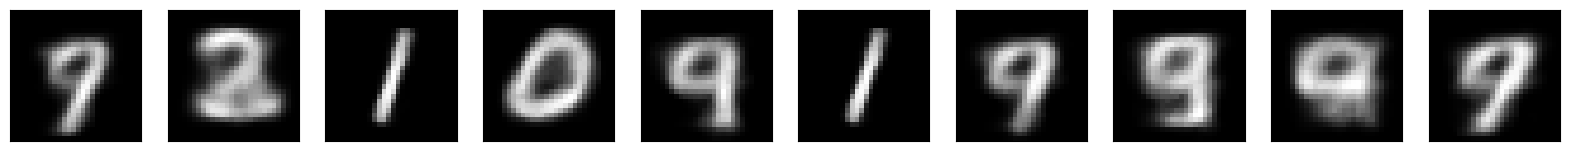

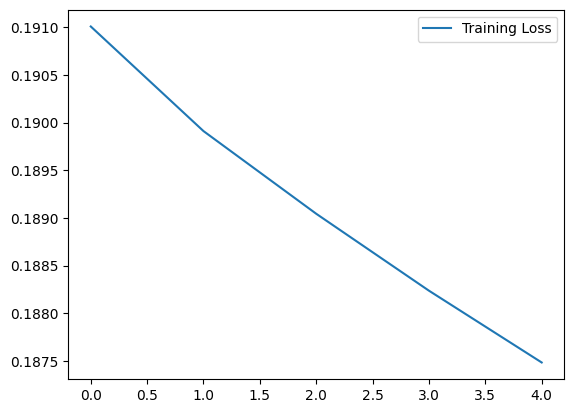

decoded images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


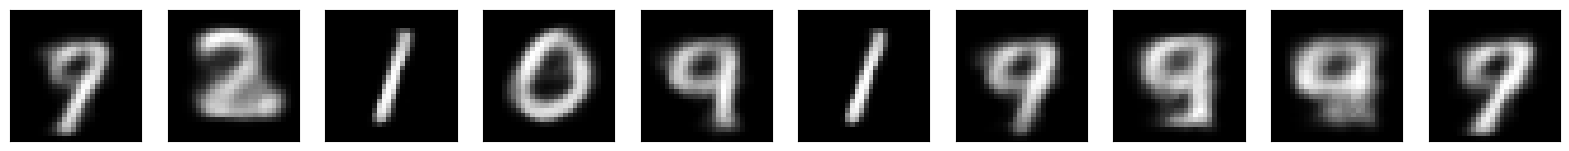

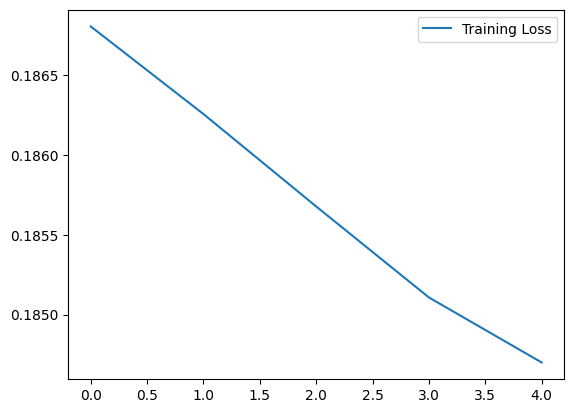

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


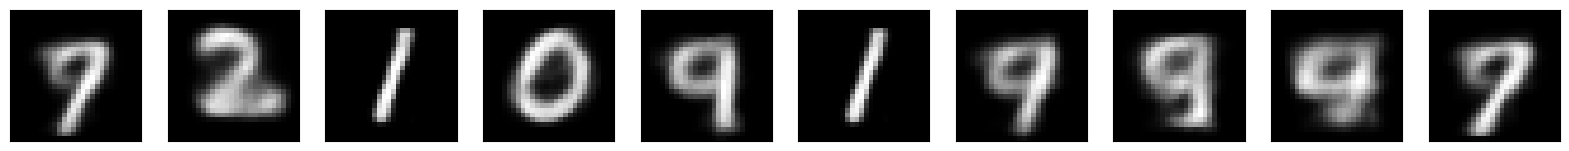

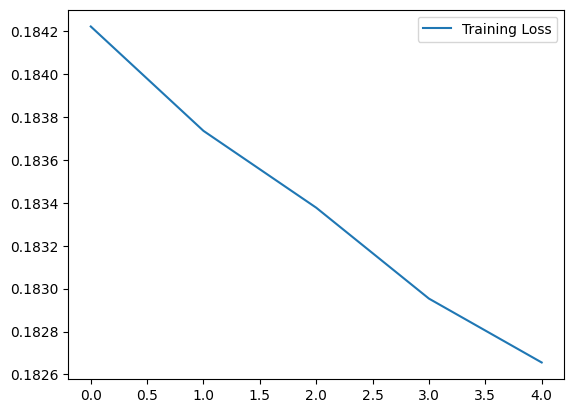

decoded images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


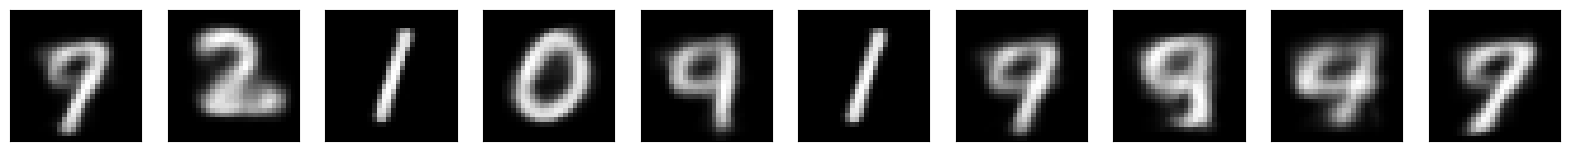

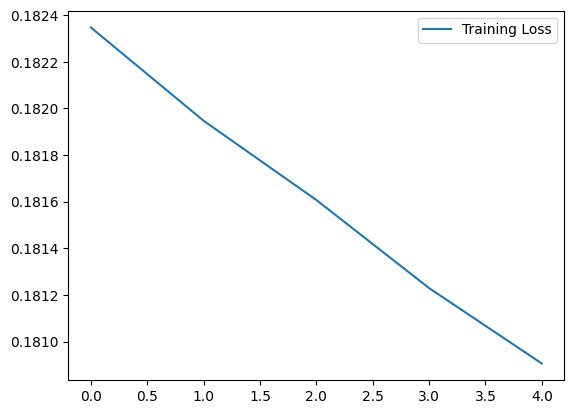

decoded images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


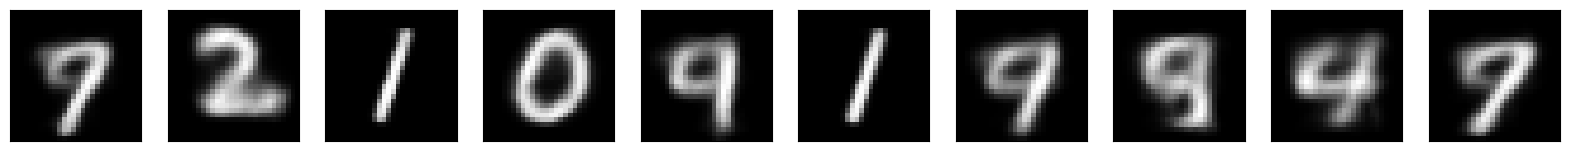

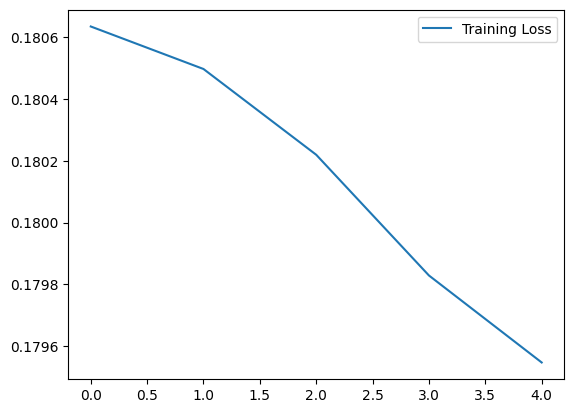

decoded images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


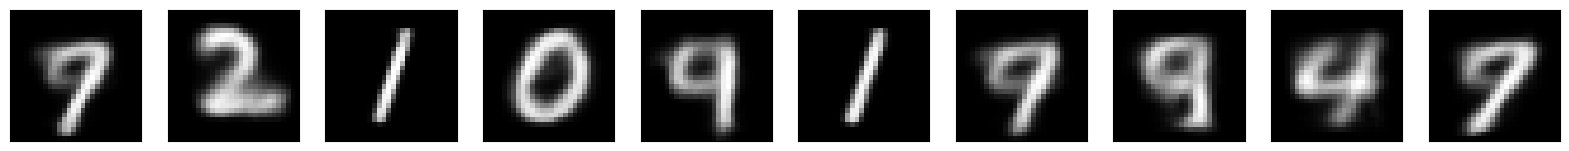

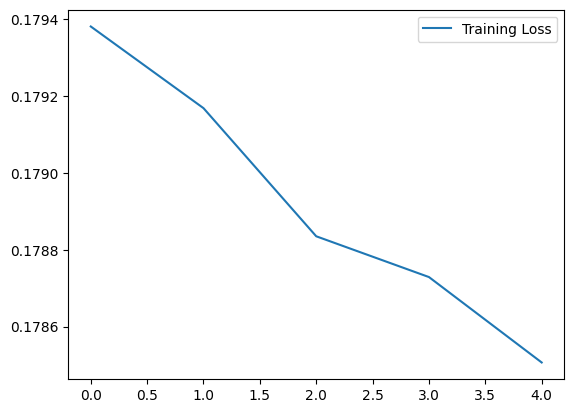

decoded images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


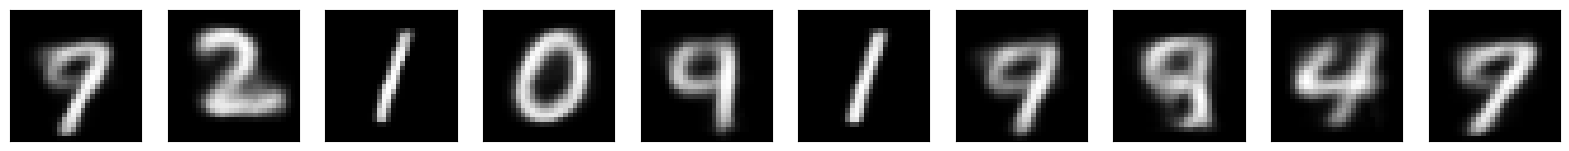

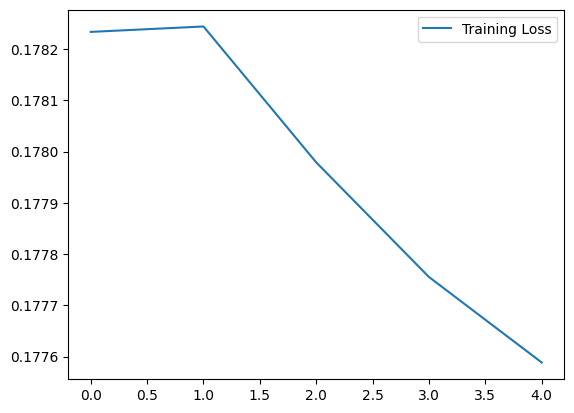

decoded images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


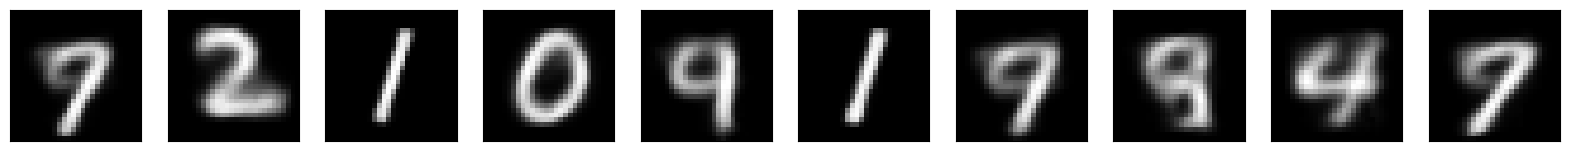

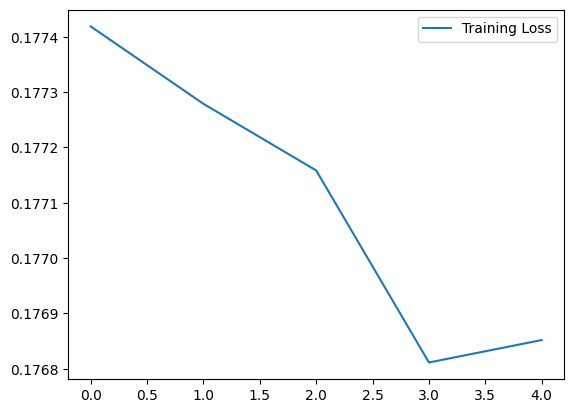

decoded images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


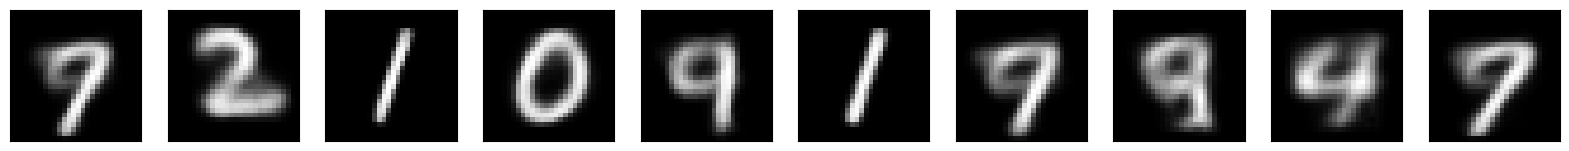

In [8]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(10):
    history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 1.2 Convolutional autoencoder

### Exercise.  
Write code for a convolutional autoencoder and see whether the performance is improved

In [ ]:
### Your code here

In [ ]:
n = 0  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:n])

for i in range(10):
    convautoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = convautoencoder.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 1.3 Application to image denoising

We first create some noisy images

Original images in test


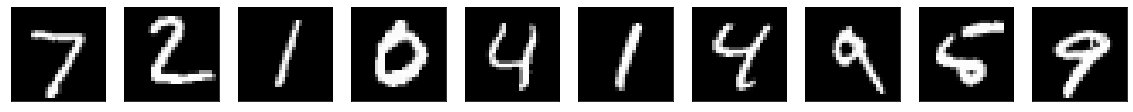

Corresponding noisy images


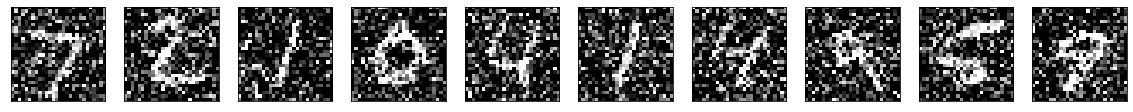

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])

And build a convolutional autoencoder

In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

## Your code here

Suppose that we have only 1000 available pairs of noisy-clean images to train.

Test images


<Figure size 1440x144 with 0 Axes>

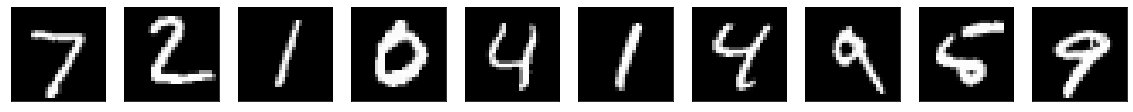

Noisy Test images


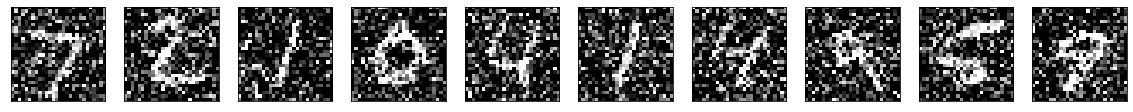

###

decoded test images at epoch  5 :


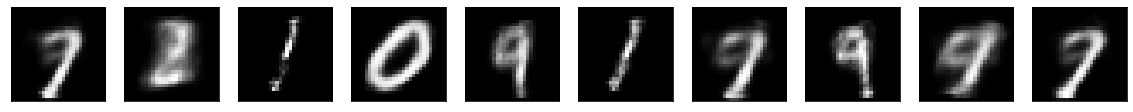

decoded noisy test images at epoch  5 :


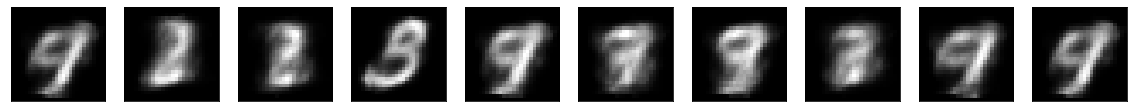

###

###

decoded test images at epoch  10 :


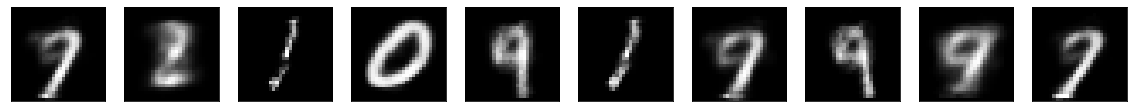

decoded noisy test images at epoch  10 :


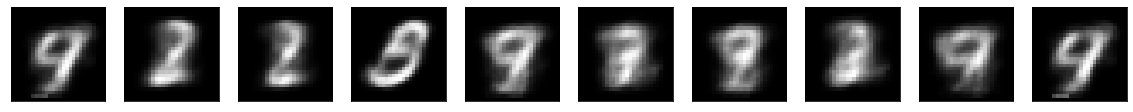

###

###

decoded test images at epoch  15 :


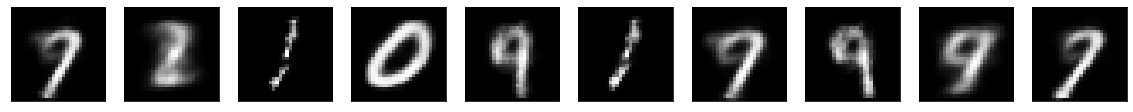

decoded noisy test images at epoch  15 :


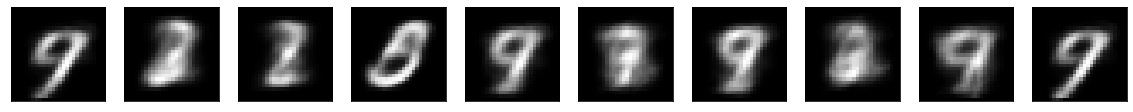

###

###

decoded test images at epoch  20 :


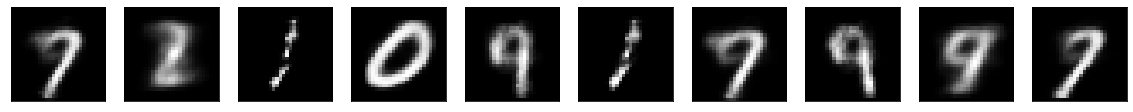

decoded noisy test images at epoch  20 :


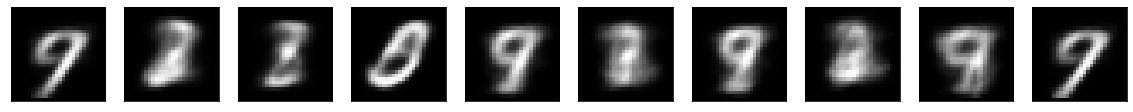

###

###

decoded test images at epoch  25 :


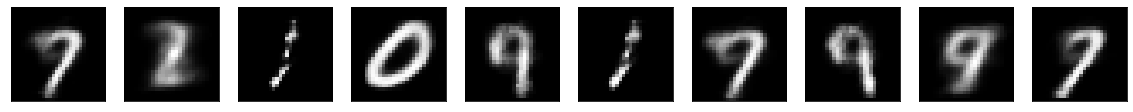

decoded noisy test images at epoch  25 :


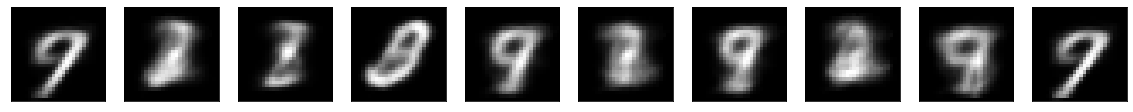

###

###

decoded test images at epoch  30 :


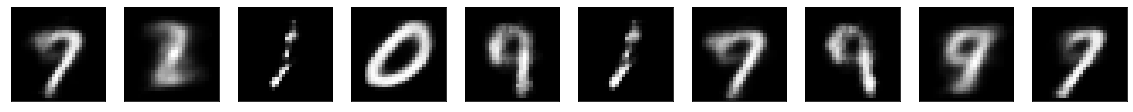

decoded noisy test images at epoch  30 :


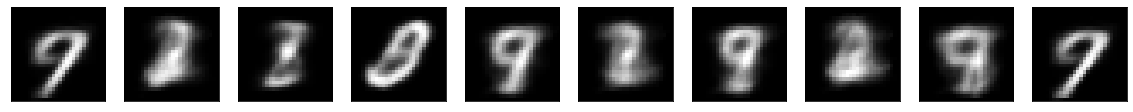

###

###

decoded test images at epoch  35 :


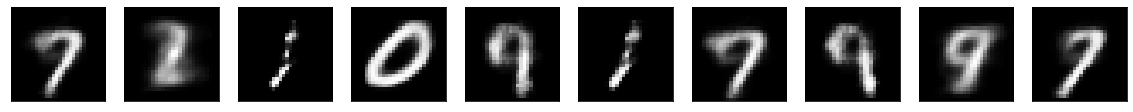

decoded noisy test images at epoch  35 :


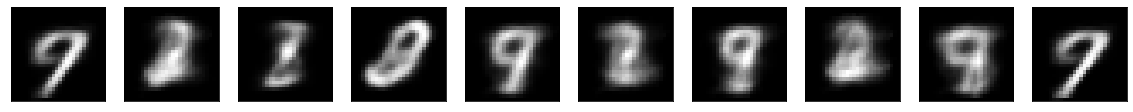

###

###

decoded test images at epoch  40 :


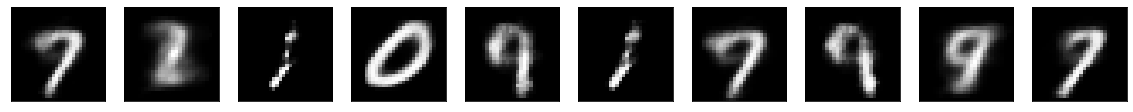

decoded noisy test images at epoch  40 :


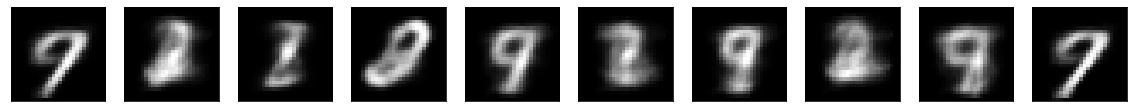

###

###

decoded test images at epoch  45 :


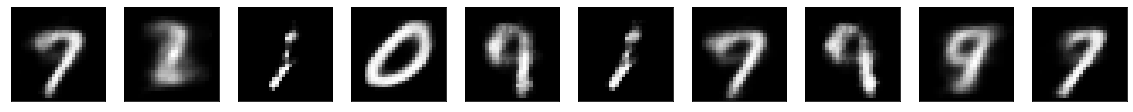

decoded noisy test images at epoch  45 :


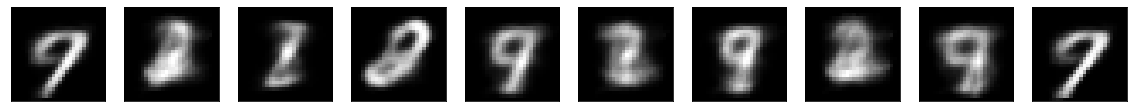

###

###

decoded test images at epoch  50 :


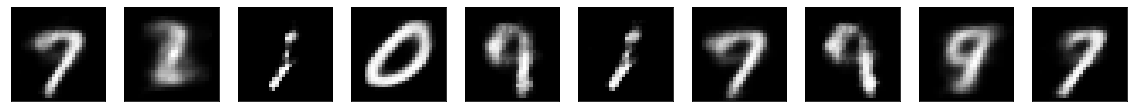

decoded noisy test images at epoch  50 :


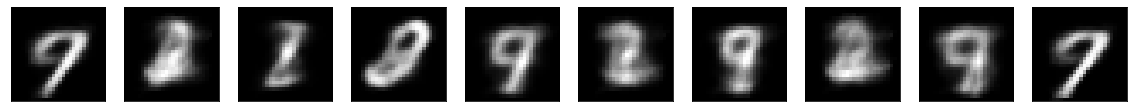

###


In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])

for i in range(10):
    autoencoder.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = autoencoder.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

## 1.4. Autoencoder with CIFAR-10

### Exercise 4.
Build your Autoencoder with CIFAR-10 and try to denoise CIFAR-10 images

In [ ]:
### Your code here

## 2. Translate this notebook to pytorch